<a href="https://colab.research.google.com/github/jcdevaney/gawayneLessons/blob/main/week2/YIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YIN algorithm, implemented in Aubio: https://aubio.org/

In [4]:
import matplotlib.pyplot as plt
import numpy as np
!pip install aubio
import aubio

!git clone https://github.com/jcdevaney/gawayneLessons.git

Cloning into 'gawayneLessons'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 101 (delta 25), reused 79 (delta 17), pack-reused 0
Receiving objects: 100% (101/101), 28.79 MiB | 39.46 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [5]:
# YIN pitches
filename='/content/gawayneLessons/files/avmA.wav'
downsample = 1
samplerate = 0
win_s = 1764 // downsample # fft size
hop_s = 441 // downsample # hop size
s = aubio.source(filename, samplerate, hop_s)
samplerate = s.samplerate
tolerance = 0.1

pitch_o = aubio.pitch("yin", win_s, hop_s, samplerate)
#pitch_o.set_unit("midi")
pitch_o.set_tolerance(tolerance)

pitchesYIN = []
confidences = []
total_frames = 0
while True:
    samples, read = s()
    pitch = pitch_o(samples)[0]
    pitch = int(round(pitch))
    confidence = pitch_o.get_confidence()
    pitchesYIN += [pitch]
    confidences += [confidence]
    total_frames += read
    if read < hop_s:
         break

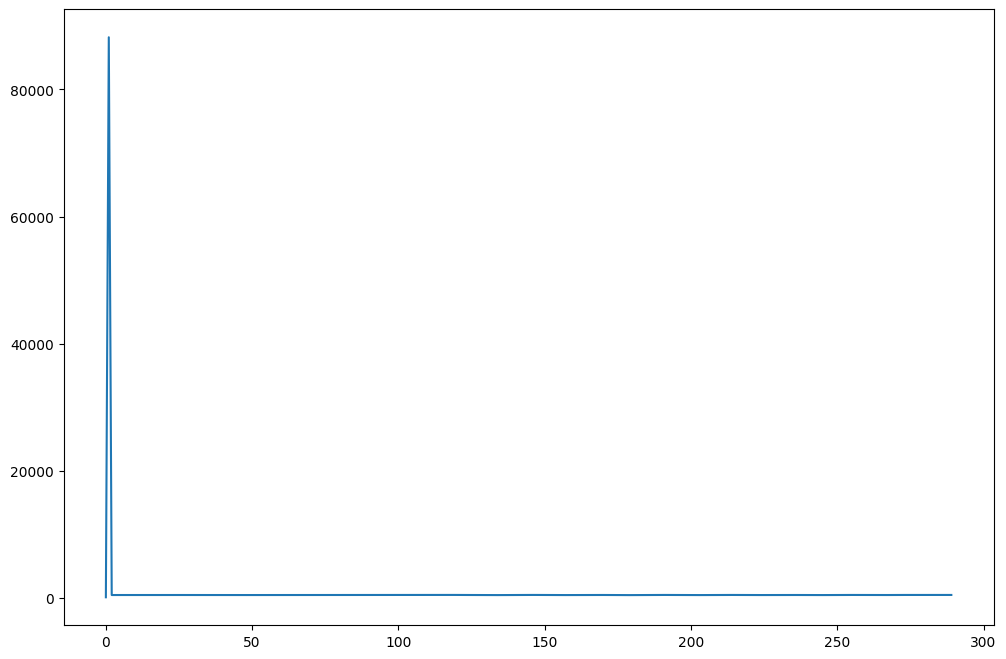

In [6]:


plt.figure(figsize=(12, 8))
plt.subplot(1,1,1)
plt.plot(np.asarray(pitchesYIN))


## Some notes on the functions

### Function 1
yinvalues = getYinVals(filename)

### Function 2
subplotFunc(yinvalues,subplotNum,additionalargs)

Calls:
plt.subplot(1,1,subplotNume) and plt.plot(np.asarray(yinvalues))

### How you'll call the functions

yinvalues1 = getYinVals(filename1)
yinvalues2 = getYinVals(filename2)
yinvalues3 = getYinVals(filename3)
yinvalues4 = getYinVals(filename4)
yinvalues5 = getYinVals(filename5)
yinvalues6 = getYinVals(filename6)

plt.figure(figsize=(12, 8))

subplotFunc(yinvalues1,1,additionalargs)
subplotFunc(yinvalues2,2,additionalargs)
subplotFunc(yinvalues3,3,additionalargs)
subplotFunc(yinvalues4,4,additionalargs)
subplotFunc(yinvalues5,5,additionalargs)
subplotFunc(yinvalues6,6,additionalargs)

# pYIN algorithm, implemented in librosa: https://librosa.org/

In [11]:
# USE THIS CODE

import matplotlib.pyplot as plt
import numpy as np
import librosa

!git clone https://github.com/jcdevaney/gawayneLessons.git

fatal: destination path 'gawayneLessons' already exists and is not an empty directory.


In [15]:
# USE THIS CODE

#https://librosa.org/doc/latest/generated/librosa.pyin.html

# loading the audio file
y, sr = librosa.load('//content/gawayneLessons/files/avm.wav')

# runing the f0 estimation
f0, voiced_flag, voiced_probs = librosa.pyin(y,
                                             fmin=librosa.note_to_hz('C2'),
                                             fmax=librosa.note_to_hz('C7'))

# is to create a vector of time points that corresponds to the audio (useful for plotting)
times = librosa.times_like(f0)

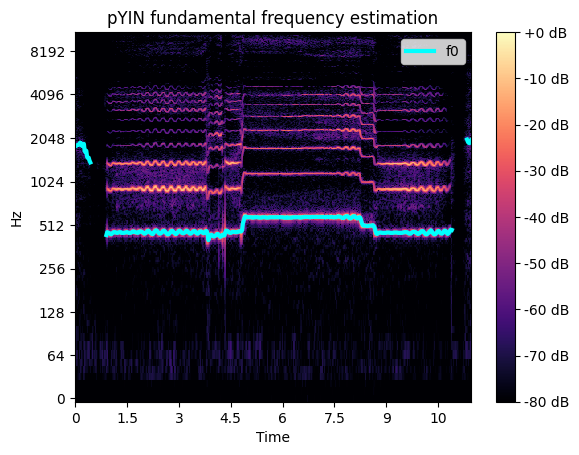

In [16]:
# USE THIS CODE

# Overlay F0 over a spectrogram

# run the short time fourier transform
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# setting up subplots
fig, ax = plt.subplots()

# generating the spectrogram
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)

# plotting
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

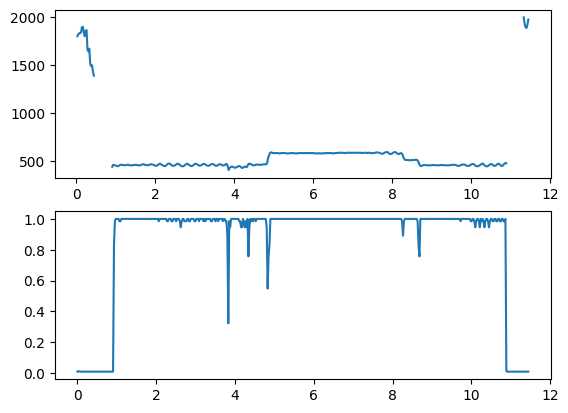

In [20]:
fig, ax = plt.subplots(2)
ax[0].plot(times, f0)
ax[1].plot(times, voiced_probs)